In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from win32cryptcon import szOID_PKIX_KP_CLIENT_AUTH

Training with missing data

In [2]:
df = pd.read_csv("./inputs/train.csv")
target = df["Price"]
df.drop("Price", inplace=True, axis=1)
df.drop("id", inplace=True, axis=1)
data = df
data

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338
...,...,...,...,...,...,...,...,...,...
299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812
299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182
299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250
299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738


In [3]:
for i in data:
    if i != "Weight Capacity (kg)" and i != "Compartments":
        data[i] = LabelEncoder().fit_transform(data[i])

data

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,1,1,1,7.0,1,0,2,0,11.611723
1,1,0,2,10.0,1,1,1,3,27.078537
2,4,1,2,2.0,1,0,1,5,16.643760
3,2,2,2,8.0,1,0,1,3,12.937220
4,0,0,1,1.0,1,1,1,3,17.749338
...,...,...,...,...,...,...,...,...,...
299995,0,1,2,9.0,0,0,2,1,12.730812
299996,1,1,0,6.0,0,1,2,1,26.633182
299997,3,0,0,9.0,1,1,0,4,11.898250
299998,0,2,2,1.0,0,1,2,4,6.175738


In [4]:
for i in data:
    if sorted(data[i].unique())[-1] < 8:
        data[i] = np.where(data[i] == sorted(data[i].unique())[-1], np.nan, data[i])

%store data
data

Stored 'data' (DataFrame)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,1.0,1.0,1.0,7.0,1.0,0.0,2.0,0.0,11.611723
1,1.0,0.0,2.0,10.0,1.0,1.0,1.0,3.0,27.078537
2,4.0,1.0,2.0,2.0,1.0,0.0,1.0,5.0,16.643760
3,2.0,2.0,2.0,8.0,1.0,0.0,1.0,3.0,12.937220
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,17.749338
...,...,...,...,...,...,...,...,...,...
299995,0.0,1.0,2.0,9.0,0.0,0.0,2.0,1.0,12.730812
299996,1.0,1.0,0.0,6.0,0.0,1.0,2.0,1.0,26.633182
299997,3.0,0.0,0.0,9.0,1.0,1.0,0.0,4.0,11.898250
299998,0.0,2.0,2.0,1.0,0.0,1.0,2.0,4.0,6.175738


In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [57]:
model = CatBoostRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean = root_mean_squared_error(y_test, y_pred)
print(mean)

0:	learn: 39.0627084	total: 22.3ms	remaining: 22.3s
1:	learn: 39.0622251	total: 43.4ms	remaining: 21.7s
2:	learn: 39.0618068	total: 64.3ms	remaining: 21.4s
3:	learn: 39.0613985	total: 87.1ms	remaining: 21.7s
4:	learn: 39.0610011	total: 110ms	remaining: 21.8s
5:	learn: 39.0605525	total: 131ms	remaining: 21.7s
6:	learn: 39.0600632	total: 152ms	remaining: 21.6s
7:	learn: 39.0596537	total: 176ms	remaining: 21.8s
8:	learn: 39.0592238	total: 196ms	remaining: 21.6s
9:	learn: 39.0588434	total: 215ms	remaining: 21.3s
10:	learn: 39.0584232	total: 233ms	remaining: 20.9s
11:	learn: 39.0580634	total: 260ms	remaining: 21.4s
12:	learn: 39.0575858	total: 315ms	remaining: 23.9s
13:	learn: 39.0572276	total: 349ms	remaining: 24.6s
14:	learn: 39.0568530	total: 379ms	remaining: 24.9s
15:	learn: 39.0564742	total: 400ms	remaining: 24.6s
16:	learn: 39.0561144	total: 422ms	remaining: 24.4s
17:	learn: 39.0557588	total: 441ms	remaining: 24.1s
18:	learn: 39.0554863	total: 461ms	remaining: 23.8s
19:	learn: 39.0550

In [52]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[-0.70094022, -0.49453064,  0.02442114, ...,  1.22122741,
        -1.48598956, -0.92125175],
       [-0.70094022, -1.38562318,  1.26259025, ..., -0.01215091,
         0.28366544,  1.2987899 ],
       [ 1.39777404, -0.49453064,  1.26259025, ..., -0.01215091,
         1.46343543, -0.19897422],
       ...,
       [ 0.69820262, -1.38562318, -1.21374797, ..., -1.24552922,
         0.87355044, -0.88012488],
       [-1.40051165,  0.39656189,  1.26259025, ...,  1.22122741,
         0.87355044, -1.70151025],
       [ 1.39777404, -1.38562318,  1.26259025, ..., -1.24552922,
        -1.48598956,  0.07734728]])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

In [56]:
clf = CatBoostRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
mean = root_mean_squared_error(y_test, y_pred)
print(mean)

0:	learn: 39.0627084	total: 13.4ms	remaining: 13.3s
1:	learn: 39.0622251	total: 30.1ms	remaining: 15s
2:	learn: 39.0618068	total: 41.1ms	remaining: 13.7s
3:	learn: 39.0613985	total: 51.4ms	remaining: 12.8s
4:	learn: 39.0610011	total: 65.2ms	remaining: 13s
5:	learn: 39.0605525	total: 78.5ms	remaining: 13s
6:	learn: 39.0600632	total: 90.8ms	remaining: 12.9s
7:	learn: 39.0596537	total: 103ms	remaining: 12.7s
8:	learn: 39.0592238	total: 114ms	remaining: 12.6s
9:	learn: 39.0588434	total: 126ms	remaining: 12.5s
10:	learn: 39.0584232	total: 138ms	remaining: 12.4s
11:	learn: 39.0580634	total: 150ms	remaining: 12.3s
12:	learn: 39.0575858	total: 161ms	remaining: 12.2s
13:	learn: 39.0572276	total: 172ms	remaining: 12.1s
14:	learn: 39.0568530	total: 184ms	remaining: 12.1s
15:	learn: 39.0564742	total: 195ms	remaining: 12s
16:	learn: 39.0561144	total: 207ms	remaining: 12s
17:	learn: 39.0557588	total: 218ms	remaining: 11.9s
18:	learn: 39.0554863	total: 231ms	remaining: 11.9s
19:	learn: 39.0550826	tot

Training with no missing data

In [16]:
df = pd.read_csv("./modified_inputs/no_missing_train.csv")
target = df["Price"]
df.drop("Price", inplace=True, axis=1)
df.drop("id", inplace=True, axis=1)
df

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338
...,...,...,...,...,...,...,...,...,...
246681,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812
246682,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182
246683,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250
246684,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738


In [18]:
# Encoding the data
for i in df:
    if i != "Compartments" and i != "Weight Capacity (kg)":
        df[i] = LabelEncoder().fit_transform(df[i])

df

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,1,1,1,7.0,1,0,2,0,11.611723
1,1,0,2,10.0,1,1,1,3,27.078537
2,4,1,2,2.0,1,0,1,5,16.643760
3,2,2,2,8.0,1,0,1,3,12.937220
4,0,0,1,1.0,1,1,1,3,17.749338
...,...,...,...,...,...,...,...,...,...
246681,0,1,2,9.0,0,0,2,1,12.730812
246682,1,1,0,6.0,0,1,2,1,26.633182
246683,3,0,0,9.0,1,1,0,4,11.898250
246684,0,2,2,1.0,0,1,2,4,6.175738


In [21]:
# Scale the data
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[-0.69931374, -0.4928208 ,  0.02206268, ...,  1.22338265,
        -1.4867244 , -0.91959901],
       [-0.69931374, -1.38398693,  1.26097809, ..., -0.01088741,
         0.28357779,  1.30109828],
       [ 1.39982729, -0.4928208 ,  1.26097809, ..., -0.01088741,
         1.46377925, -0.19710817],
       ...,
       [ 0.70011362, -1.38398693, -1.21685273, ..., -1.24515747,
         0.87367852, -0.87845999],
       [-1.39902741,  0.39834533,  1.26097809, ...,  1.22338265,
         0.87367852, -1.70008793],
       [ 1.39982729, -1.38398693,  1.26097809, ..., -1.24515747,
        -1.4867244 ,  0.07929494]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

In [25]:
clf = CatBoostRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean = root_mean_squared_error(y_test, y_pred)
print(mean)

0:	learn: 38.9548530	total: 14.6ms	remaining: 14.5s
1:	learn: 38.9546038	total: 28.8ms	remaining: 14.4s
2:	learn: 38.9543747	total: 42.7ms	remaining: 14.2s
3:	learn: 38.9541144	total: 58.3ms	remaining: 14.5s
4:	learn: 38.9538258	total: 78.6ms	remaining: 15.6s
5:	learn: 38.9535447	total: 91.2ms	remaining: 15.1s
6:	learn: 38.9533002	total: 106ms	remaining: 15.1s
7:	learn: 38.9530500	total: 119ms	remaining: 14.8s
8:	learn: 38.9527453	total: 132ms	remaining: 14.6s
9:	learn: 38.9524616	total: 144ms	remaining: 14.3s
10:	learn: 38.9522376	total: 156ms	remaining: 14s
11:	learn: 38.9520299	total: 171ms	remaining: 14s
12:	learn: 38.9518128	total: 183ms	remaining: 13.9s
13:	learn: 38.9515769	total: 194ms	remaining: 13.6s
14:	learn: 38.9513071	total: 205ms	remaining: 13.4s
15:	learn: 38.9510473	total: 218ms	remaining: 13.4s
16:	learn: 38.9508856	total: 230ms	remaining: 13.3s
17:	learn: 38.9506708	total: 241ms	remaining: 13.1s
18:	learn: 38.9504834	total: 252ms	remaining: 13s
19:	learn: 38.9502510	

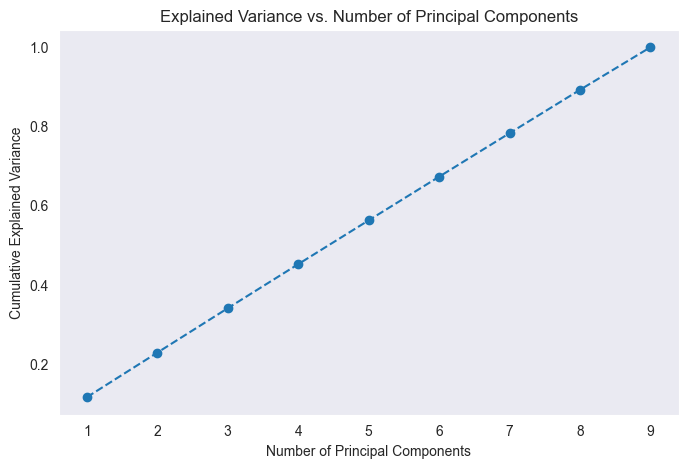

Explained Variance Ratios: [0.11435118 0.11277656 0.11238461 0.11149622 0.11089533 0.11043414
 0.11017635 0.10971668 0.10776894]
Cumulative Variance: [0.11435118 0.22712774 0.33951235 0.45100857 0.5619039  0.67233803
 0.78251438 0.89223106 1.        ]


In [29]:
# Introducing PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

In [39]:
# pd.DataFrame(pca.transform(scaled_data)).describe()
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8
0,-0.699314,-0.492821,0.022063,0.537355,0.985535,-1.009318,1.223383,-1.486724,-0.919599
1,-0.699314,-1.383987,1.260978,1.576715,0.985535,0.990768,-0.010887,0.283578,1.301098
2,1.399827,-0.492821,1.260978,-1.194912,0.985535,-1.009318,-0.010887,1.463779,-0.197108
3,0.000400,0.398345,1.260978,0.883808,0.985535,-1.009318,-0.010887,0.283578,-0.729286
4,-1.399027,-1.383987,0.022063,-1.541366,0.985535,0.990768,-0.010887,0.283578,-0.038371
...,...,...,...,...,...,...,...,...,...
246681,-1.399027,-0.492821,1.260978,1.230262,-1.014677,-1.009318,1.223383,-0.896624,-0.758922
246682,-0.699314,-0.492821,-1.216853,0.190901,-1.014677,0.990768,1.223383,-0.896624,1.237155
246683,0.700114,-1.383987,-1.216853,1.230262,0.985535,0.990768,-1.245157,0.873679,-0.878460
246684,-1.399027,0.398345,1.260978,-1.541366,-1.014677,0.990768,1.223383,0.873679,-1.700088


In [30]:
# Transforming data using PCA
X_pca = pca.transform(scaled_data)
X_train,X_test,y_train,y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [59]:
clf = CatBoostRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean = root_mean_squared_error(y_test, y_pred)
print(mean)

0:	learn: 39.0627084	total: 11.7ms	remaining: 11.6s
1:	learn: 39.0622251	total: 22.3ms	remaining: 11.2s
2:	learn: 39.0618068	total: 33.5ms	remaining: 11.1s
3:	learn: 39.0613985	total: 44.1ms	remaining: 11s
4:	learn: 39.0610011	total: 57ms	remaining: 11.3s
5:	learn: 39.0605525	total: 67.9ms	remaining: 11.2s
6:	learn: 39.0600632	total: 78.5ms	remaining: 11.1s
7:	learn: 39.0596537	total: 89.9ms	remaining: 11.1s
8:	learn: 39.0592238	total: 104ms	remaining: 11.4s
9:	learn: 39.0588434	total: 116ms	remaining: 11.5s
10:	learn: 39.0584232	total: 127ms	remaining: 11.4s
11:	learn: 39.0580634	total: 138ms	remaining: 11.3s
12:	learn: 39.0575858	total: 148ms	remaining: 11.2s
13:	learn: 39.0572276	total: 158ms	remaining: 11.1s
14:	learn: 39.0568530	total: 169ms	remaining: 11.1s
15:	learn: 39.0564742	total: 179ms	remaining: 11s
16:	learn: 39.0561144	total: 189ms	remaining: 10.9s
17:	learn: 39.0557588	total: 199ms	remaining: 10.9s
18:	learn: 39.0554863	total: 210ms	remaining: 10.9s
19:	learn: 39.055082